# Amazon review on the product of mobile electronics 

### Used the data from Tensorflow data sets - amazon_us_reviews 

### Description- This Dataset contains review on one language 'english' and it has been extracted from the market of 'US'

# <span style="color:blue">1)Loading the data set and removing the columns un-related to project </span>

In [13]:
# Necessary library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re
from collections import Counter
from nltk import word_tokenize
from nltk import sent_tokenize
import sklearn
import spacy
import nltk
import wordcloud
nltk.download('wordnet')
from nltk import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Version of the Libraray used in this project


In [15]:
print('The pandas version is: ',pd.__version__)
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The Numpy version is: ', np.__version__)
print('NLTK version: ', nltk.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Wordcloud version: ', wordcloud.__version__)
print('Spacy version: ', spacy.__version__)

The pandas version is:  2.1.4
The scikit-learn version is 1.2.2.
The Numpy version is:  1.26.3
NLTK version:  3.8.1
Matplotlib version:  3.8.0
Wordcloud version:  1.9.3
Spacy version:  3.7.4


In [16]:
df = pd.read_csv('amazon_reviews_us_Mobile_Electronics_v1_00.tsv',sep='\t',on_bad_lines='warn')
viz_df = df.copy() # Visualization df only used for visualizing insights from all columns

df.head()

Skipping line 35246: expected 15 fields, saw 22

Skipping line 87073: expected 15 fields, saw 22



marketplace  customer_id       review_id  product_id  product_parent  \
0          US     20422322   R8MEA6IGAHO0B  B00MC4CED8       217304173   
1          US     40835037  R31LOQ8JGLPRLK  B00OQMFG1Q       137313254   
2          US     51469641  R2Y0MM9YE6OP3P  B00QERR5CY        82850235   
3          US      4332923   RRB9C05HDOD4O  B00QUFTPV4       221169481   
4          US     44855305  R26I2RI1GFV8QG  B0067XVNTG       563475445   

                                       product_title    product_category  \
0                               BlackVue DR600GW-PMP  Mobile_Electronics   
1  GENSSI GSM / GPS Two Way Smart Phone Car Alarm...  Mobile_Electronics   
2                    iXCC Multi pack Lightning cable  Mobile_Electronics   
3  abcGoodefg® FBI Covert Acoustic Tube Earpiece ...  Mobile_Electronics   
4  Generic Car Dashboard Video Camera Vehicle Vid...  Mobile_Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N                 Y   
1          5.0            0.0          1.0    N                 Y   
2          5.0            0.0          0.0    N                 Y   
3          4.0            0.0          0.0    N                 Y   
4          2.0            0.0          0.0    N                 Y   

                                     review_headline  \
0                                        Very Happy!   
1                                          five star   
2                                       great cables   
3  Work very well but couldn't get used to not he...   
4                         Cameras has battery issues   

                                         review_body review_date  
0  As advertised. Everything works perfectly, I'm...  2015-08-31  
1                                         it's great  2015-08-31  
2  These work great and fit my life proof case fo...  2015-08-31  
3  Work very well but couldn't get used to not he...  2015-08-31  
4  Be careful with these products, I have bought ...  2015-08-31

# 2)Reading the dataset with information

In [17]:
#shape
df.shape

(104852, 15)

In [18]:
#checking for null values
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          2
helpful_votes        2
total_votes          2
vine                 2
verified_purchase    2
review_headline      4
review_body          4
review_date          2
dtype: int64

In [19]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104852 entries, 0 to 104851
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   marketplace        104852 non-null  object 
 1   customer_id        104852 non-null  int64  
 2   review_id          104852 non-null  object 
 3   product_id         104852 non-null  object 
 4   product_parent     104852 non-null  int64  
 5   product_title      104852 non-null  object 
 6   product_category   104852 non-null  object 
 7   star_rating        104850 non-null  float64
 8   helpful_votes      104850 non-null  float64
 9   total_votes        104850 non-null  float64
 10  vine               104850 non-null  object 
 11  verified_purchase  104850 non-null  object 
 12  review_headline    104848 non-null  object 
 13  review_body        104848 non-null  object 
 14  review_date        104850 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1

# 3) Data Wrangling

## 3.1)Distribution of values in columns

<Axes: >

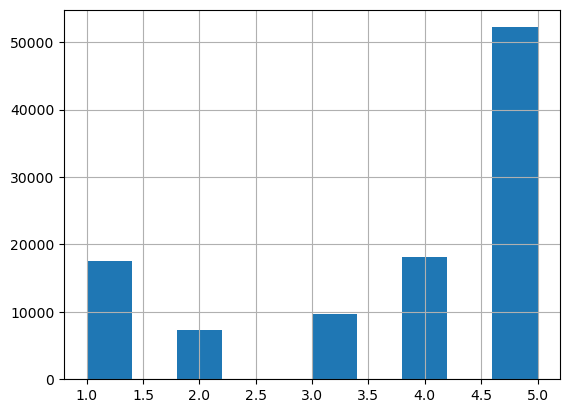

In [20]:
#visualizing the star rating column
df['star_rating'].hist()

<Axes: >

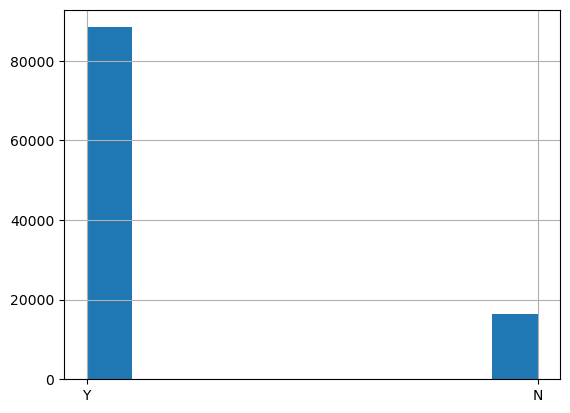

In [21]:
#if it is not a verified one, it can be biased. has to remove those review under some conditions
df['verified_purchase'].hist()

In [22]:
df.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     20422322   R8MEA6IGAHO0B  B00MC4CED8       217304173   
1          US     40835037  R31LOQ8JGLPRLK  B00OQMFG1Q       137313254   
2          US     51469641  R2Y0MM9YE6OP3P  B00QERR5CY        82850235   
3          US      4332923   RRB9C05HDOD4O  B00QUFTPV4       221169481   
4          US     44855305  R26I2RI1GFV8QG  B0067XVNTG       563475445   

                                       product_title    product_category  \
0                               BlackVue DR600GW-PMP  Mobile_Electronics   
1  GENSSI GSM / GPS Two Way Smart Phone Car Alarm...  Mobile_Electronics   
2                    iXCC Multi pack Lightning cable  Mobile_Electronics   
3  abcGoodefg® FBI Covert Acoustic Tube Earpiece ...  Mobile_Electronics   
4  Generic Car Dashboard Video Camera Vehicle Vid...  Mobile_Electronics   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N                 Y   
1          5.0            0.0          1.0    N                 Y   
2          5.0            0.0          0.0    N                 Y   
3          4.0            0.0          0.0    N                 Y   
4          2.0            0.0          0.0    N                 Y   

                                     review_headline  \
0                                        Very Happy!   
1                                          five star   
2                                       great cables   
3  Work very well but couldn't get used to not he...   
4                         Cameras has battery issues   

                                         review_body review_date  
0  As advertised. Everything works perfectly, I'm...  2015-08-31  
1                                         it's great  2015-08-31  
2  These work great and fit my life proof case fo...  2015-08-31  
3  Work very well but couldn't get used to not he...  2015-08-31  
4  Be careful with these products, I have bought ...  2015-08-31

In [23]:
#changing to datetime
df['review_date'] = pd.to_datetime(df['review_date'])

## 3.2)since we have small number of null values we decided to omit the null values

In [24]:
#missing values dropping
df.dropna(subset=['star_rating', 'review_body', 'review_headline'], inplace=True, axis=0)
viz_df.dropna(subset=['star_rating', 'review_body','review_headline'], inplace=True, axis=0)

In [25]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

## 3.3)Merging the review_headline and review_body as the full_review


In [26]:
#merging the review_headline and review_body as the full_review. the reason for
#this is as both column will have insight for the model
df["full_review"] = df["review_headline"]+" " +df["review_body"]

In [27]:
#viewing full reviews column
df['full_review']

0         Very Happy! As advertised. Everything works pe...
1                                      five star it's great
2         great cables These work great and fit my life ...
3         Work very well but couldn't get used to not he...
4         Cameras has battery issues Be careful with the...
                                ...                        
104847    The Cat Barf is Gone! I've been looking for a ...
104848    Well worth [it] We live in an apartment with h...
104849    Its a Time saver!!! I received this for a birt...
104850    Got Stains? I got the Dirt Devil Spot Scrubber...
104851    no smell has to mean it is getting the job don...
Name: full_review, Length: 104846, dtype: object

## 3.4) Visualizing the distribution with date and min review label

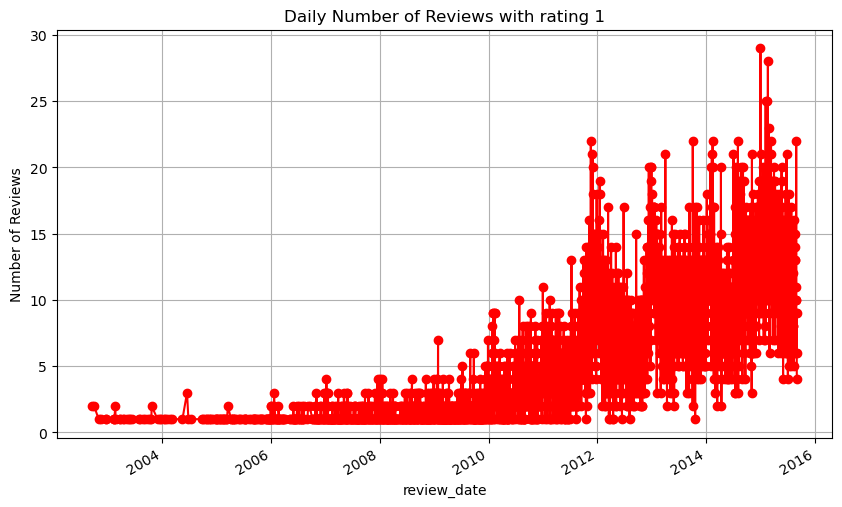

In [28]:
df_1 = df[df['star_rating'] == 1]
# df.head()

# Group by date and count the number of reviews for each day
daily_count = df_1.groupby('review_date').size()

# Plot the daily count
plt.figure(figsize=(10, 6))
daily_count.plot(kind='line', marker='o', linestyle='-', color='r')
plt.title('Daily Number of Reviews with rating 1')
plt.xlabel('review_date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


## 3.5) Subsetting the whole dataset 

In [29]:
#creating new dataframe with star rating and full review data
df = df[['star_rating','full_review']]

In [30]:
df.head()

star_rating                                        full_review
0          5.0  Very Happy! As advertised. Everything works pe...
1          5.0                               five star it's great
2          5.0  great cables These work great and fit my life ...
3          4.0  Work very well but couldn't get used to not he...
4          2.0  Cameras has battery issues Be careful with the...

## 3.6)Setting up label column for training and testing purposes

In [31]:
#creating a review label column
def label_review(df):
    df['review_label'] = df['star_rating'].apply(lambda x: 1 if x > 3 else 0)
    return df

# Call the function with your DataFrame 'df'
df = label_review(df)

# Call the function with your DataFrame 'df'
viz_df = label_review(viz_df)

In [32]:
df.head(10)

star_rating                                        full_review  \
0          5.0  Very Happy! As advertised. Everything works pe...   
1          5.0                               five star it's great   
2          5.0  great cables These work great and fit my life ...   
3          4.0  Work very well but couldn't get used to not he...   
4          2.0  Cameras has battery issues Be careful with the...   
5          3.0  It appears to be good, but I'm still waiting f...   
6          3.0  Didn't love the first one First one arrived as...   
7          5.0               Five Stars Worked great for vacation   
8          4.0  Four Stars this is a very good item, it provid...   
9          5.0  I LOVE my recorder I LOVE my recorder. Bought ...   

   review_label  
0             1  
1             1  
2             1  
3             1  
4             0  
5             0  
6             0  
7             1  
8             1  
9             1

In [33]:
#dropping the star rating column
df = df.drop('star_rating',axis = 1)

In [34]:
df = df[:20000]
viz_df = viz_df[:20000]

## 3.7)Final Data frame before text preprocessing 

In [35]:
df.head()
df[df['review_label'] == 0]

full_review  review_label
4      Cameras has battery issues Be careful with the...             0
5      It appears to be good, but I'm still waiting f...             0
6      Didn't love the first one First one arrived as...             0
11     More of a beeper than a buzzer - good part, ba...             0
13                                        One Star Sucks             0
...                                                  ...           ...
19984  only for some older devices. Does not work for...             0
19987  picture shows 4 but it's only for 2 Thought it...             0
19988  One Star Won't work with our phones...not supp...             0
19990  The part that plugs into the car is too small ...             0
19998  The shipping and price were fine but the produ...             0

[6391 rows x 2 columns]

In [36]:
df.head()

full_review  review_label
0  Very Happy! As advertised. Everything works pe...             1
1                               five star it's great             1
2  great cables These work great and fit my life ...             1
3  Work very well but couldn't get used to not he...             1
4  Cameras has battery issues Be careful with the...             0

In [37]:
df.shape

(20000, 2)

In [38]:
viz_df.shape

(20000, 16)

# 4)Text pre-processing

## 4.1)Removing tokenizing, removing stop words, stemming 

In [40]:
nlp = spacy.load("en_core_web_sm", disable=["tagger", "ner", "parser"])

In [41]:
#stopword setup with custom stop words
nltk.download('stopwords')
from nltk.corpus import stopwords as nltk_stopwords
#added some more custom words as this has direct influence to the model and with more core relation possibility
#for the model to overfit will have high chance
custom_stopwords_nltk = set(nltk_stopwords.words('english'))
custom_stopwords_nltk.update(['one', 'two', 'three', 'four', 'five', 'stars'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Custom list of stopwords for Spacy
custom_stopwords_spacy = set(nltk_stopwords.words('english'))  # Spacy uses NLTK's list by default
custom_stopwords_spacy.update(['one', 'two', 'three', 'four', 'five', 'stars'])

In [43]:
# NLTK Stemming and Lemmatization
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [44]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aravindadharmalingam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
corpus_nltk_stem_lemma = []
l = len(df)

for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
    except:
        print("regex")
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(ps.stem(word)) for word in review if not word in custom_stopwords_nltk]
    review = ' '.join(review)
    corpus_nltk_stem_lemma.append(review)

regex


In [46]:
# Spacy Stemming and Lemmatization
corpus_spacy_stem_lemma = []

for i in range(l):
    try:
        review = re.sub('[^a-zA-Z]', ' ', df['full_review'][i])
    except:
        print("regex")
    review = review.lower()
    doc = nlp(review)
    
    # Spacy Stemming and Lemmatization
    review_spacy_stem_lemma = ' '.join([token.lemma_ for token in doc if token.text.lower() not in custom_stopwords_spacy])
    corpus_spacy_stem_lemma.append(review_spacy_stem_lemma)


/Users/aravindadharmalingam/anaconda3/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


regex


## 4.2) Corpus of words formed out of the review text

In [47]:
#first ten view of the nltk corpus
corpus_nltk_stem_lemma[:10]

['happi advertis everyth work perfectli happi camera matter fact go buy anoth nd car',
 'star great',
 'great cabl work great fit life proof case iphon',
 'work well get use hear work well get use hear anyth ear v plug',
 'camera batteri issu care product bought sever camera imag pretti decent batteri hold charg',
 'appear good still wait item appear good still wait item radio batteri charger go',
 'love first first arriv brick work charg useless exchang new work advertis',
 'work great vacat',
 'good item provid sound like',
 'love record love record bought obvious tape cassett way play br spent amaz afternoon listen mom pas away tell minut christma stori nichola daughter mani moon ago wonder afternoon laughter tear br thank provid time spend afternoon mom']

In [48]:
corpus_spacy_stem_lemma[:10]

['happy   advertised   everything works perfectly   happy camera   matter fact going buy another   nd car',
 'star great',
 'great cables work great fit life proof case iphone  ',
 'work well get used hearing      work well get used hearing anything ear v plugged',
 'cameras battery issues careful products   bought several cameras image pretty decent battery hold charge    ',
 'appears good   still waiting items      appears good   still waiting items radio batteries charger   go      ',
 'love first first arrived brick    work   charge   useless    exchanged new works advertised',
 'worked great vacation',
 'good item   provide sound like  ',
 'love recorder love recorder   bought obviously tape cassette way play   br    spent amazing afternoon   listening mom   passed away         tell     minute christmas story       nicholas         daughters   many moons ago    wonderful afternoon laughter tears   br    thank   providing   time spend afternoon mom      ']

## 4.3)Displaying the frequency distribution of words in the corpus

In [49]:
# Displaying the frequency distribution of words in the NLTK corpus after stemming and lemmatization
frequency_distribution_nltk_stem_lemma = FreqDist(corpus_nltk_stem_lemma)

print(frequency_distribution_nltk_stem_lemma)

frequency_distribution_nltk_stem_lemma.most_common(20)


<FreqDist with 17552 samples and 20000 outcomes>


[('good', 252),
 ('work great', 166),
 ('love', 142),
 ('great', 129),
 ('excel', 125),
 ('great product', 80),
 ('nice', 70),
 ('ok', 66),
 ('thank', 66),
 ('good product', 52),
 ('', 51),
 ('awesom', 49),
 ('work', 48),
 ('star work', 46),
 ('work well', 46),
 ('perfect', 44),
 ('excelent', 33),
 ('excel product', 29),
 ('work good', 26),
 ('expect', 23)]

In [50]:
# Displaying the frequency distribution of words in the Spacy corpus after stemming and lemmatization
frequency_distribution_spacy_stem_lema = FreqDist(corpus_spacy_stem_lemma)

print(frequency_distribution_spacy_stem_lema)


frequency_distribution_spacy_stem_lema.most_common(20)


<FreqDist with 17880 samples and 20000 outcomes>


[('good', 242),
 ('works great', 131),
 ('great', 122),
 ('love', 111),
 ('excellent', 103),
 ('great product', 71),
 ('ok', 64),
 ('nice', 62),
 ('good product', 48),
 ('awesome', 41),
 ('thanks', 39),
 ('perfect', 38),
 ('star work', 33),
 ('excelente', 32),
 ('works well', 32),
 ('works', 26),
 ('expected', 22),
 ('excellent product', 22),
 ('thank', 21),
 ('excelent', 17)]

In [51]:
# Convert NLTK frequency distribution to a DataFrame for Seaborn
df_nltk = pd.DataFrame(list(frequency_distribution_nltk_stem_lemma.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

# Convert Spacy frequency distribution to a DataFrame for Seaborn
df_spacy = pd.DataFrame(list(frequency_distribution_spacy_stem_lema.items()), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

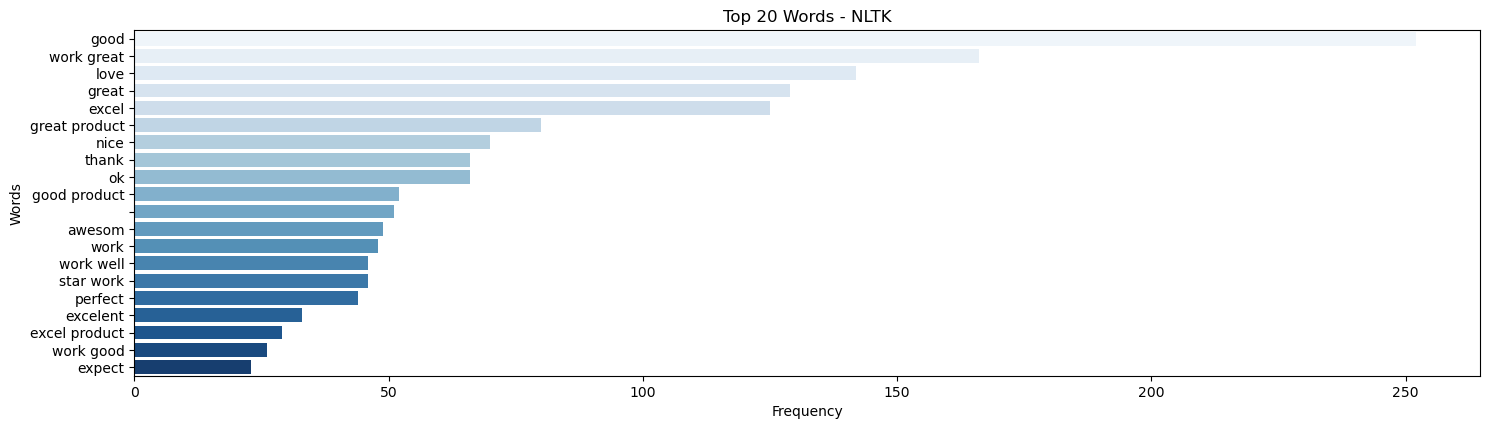

In [52]:
# Plotting horizontal bar plots using Seaborn
plt.figure(figsize=(15, 8))

# NLTK
plt.subplot(2, 1, 1)
sns.barplot(x='Frequency', y='Word', data=df_nltk, palette='Blues')
plt.title('Top 20 Words - NLTK')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

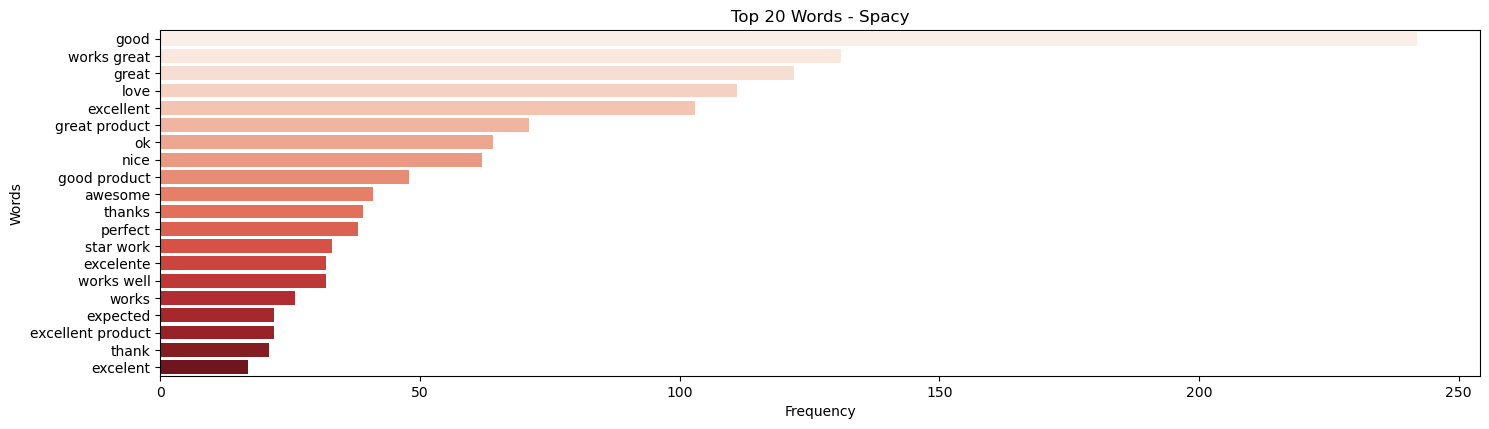

In [53]:
# Spacy
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 2)
sns.barplot(x='Frequency', y='Word', data=df_spacy, palette='Reds')
plt.title('Top 20 Words - Spacy')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

##### Displaying the Most Frequancy word in the line graph to identify the insight

In [54]:
x =[]
y =[]
for i in frequency_distribution_nltk_stem_lemma.most_common(20):
    y.append(i[0])
    x.append(i[1])

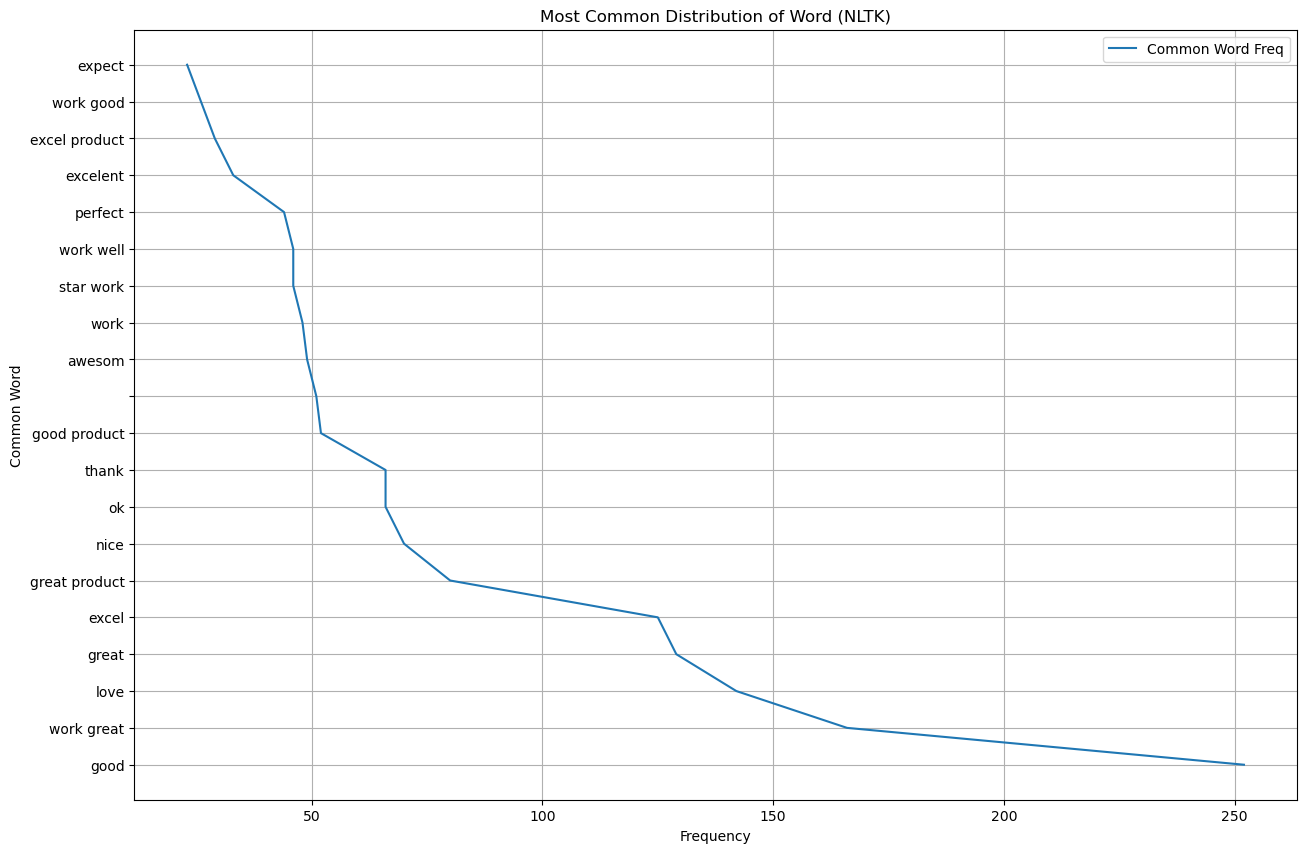

In [55]:
#plotting most common distribution of the word
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(x,y,label='Common Word Freq')
plt.title('Most Common Distribution of Word (NLTK)')
plt.xlabel('Frequency')
plt.ylabel('Common Word')
plt.legend()
plt.savefig('Frequency Distribution of Common Word using NLTK')

In [56]:
a =[]
b =[]
for i in frequency_distribution_spacy_stem_lema.most_common(20):
    b.append(i[0])
    a.append(i[1])

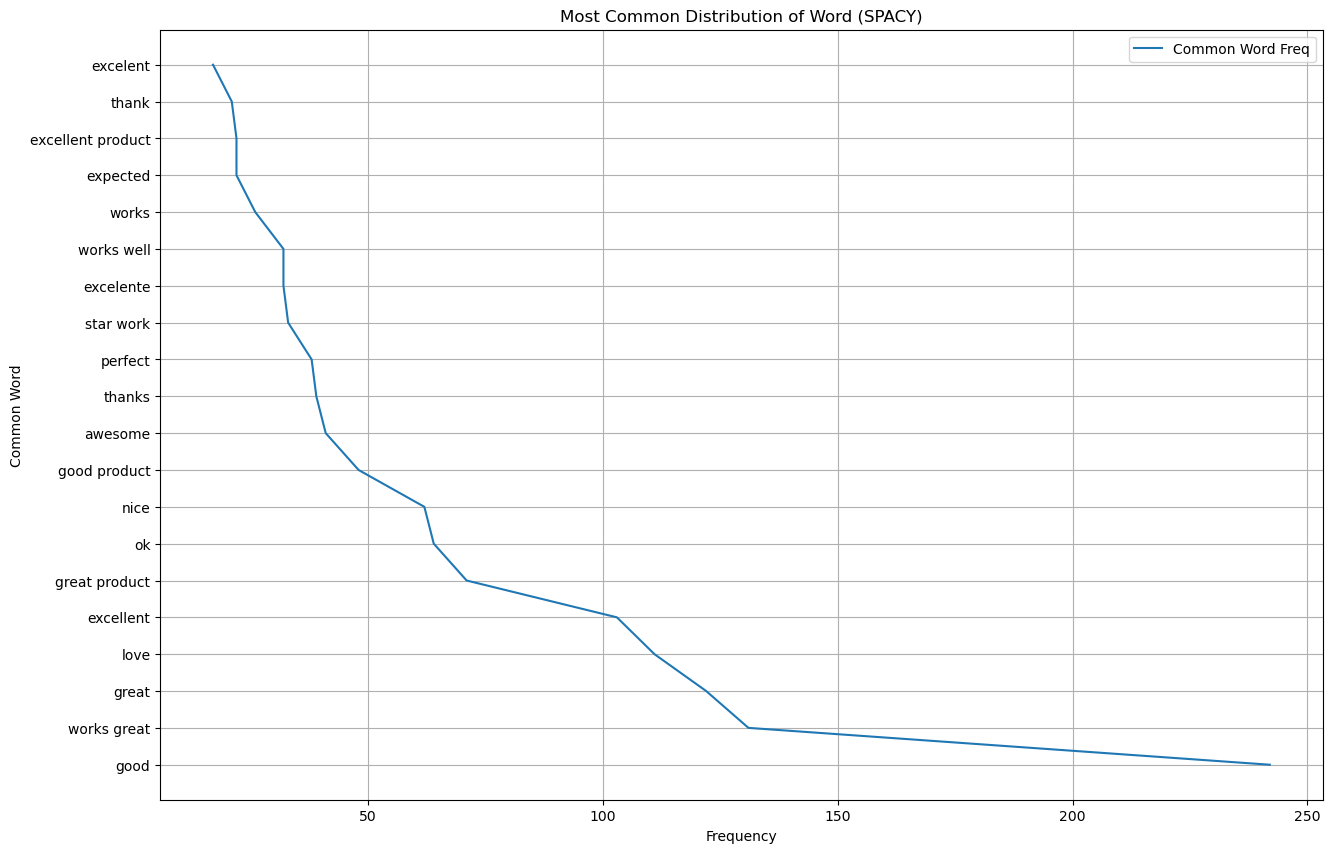

In [57]:
#plotting most common distribution of the word
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(a,b,label='Common Word Freq')
plt.title('Most Common Distribution of Word (SPACY)')
plt.xlabel('Frequency')
plt.ylabel('Common Word')
plt.legend()
plt.savefig('Frequency Distribution of Common Word using Spacy')

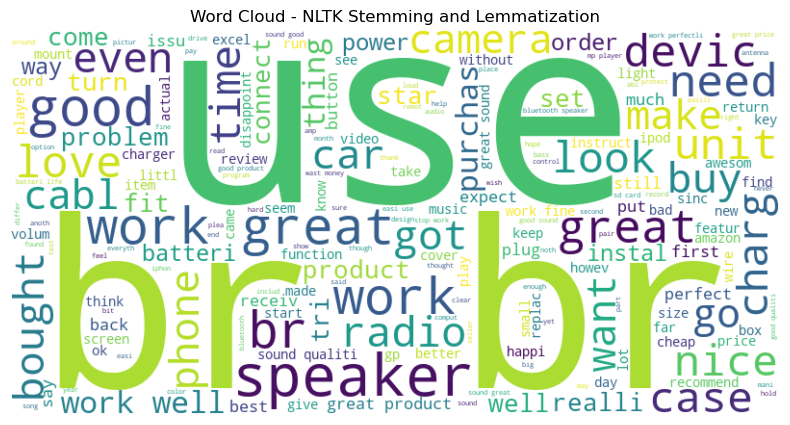

In [58]:
wordcloud_nltk = WordCloud(width=800, height=400, background_color='white').generate(' '.join(corpus_nltk_stem_lemma))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_nltk, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - NLTK Stemming and Lemmatization')
plt.show()

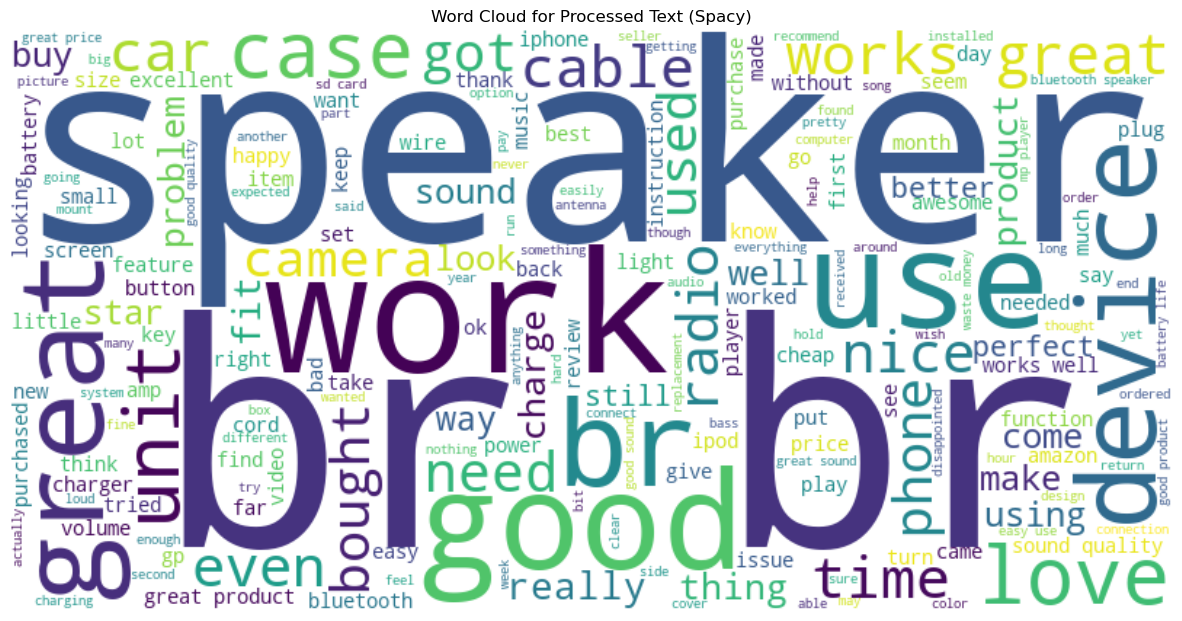

In [59]:

# Combine the processed text into a single string
processed_text_spacy = ' '.join(corpus_spacy_stem_lemma)

# Generate the word cloud
wordcloud_spacy = WordCloud(width=800, height=400, background_color='white').generate(processed_text_spacy)

# Plot the word cloud using Seaborn
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Processed Text (Spacy)')
plt.show()

## 4.4)Deriving target variable

In [60]:
# Mapping 0 and 1 to positive and negative labels
df['review_category'] = df['review_label'].map({0: 'negative', 1: 'positive'})
df 

# Mapping 0 and 1 to positive and negative labels
viz_df['review_category'] = viz_df['review_label'].map({0: 'negative', 1: 'positive'})


In [61]:
df.head()

full_review  review_label  \
0  Very Happy! As advertised. Everything works pe...             1   
1                               five star it's great             1   
2  great cables These work great and fit my life ...             1   
3  Work very well but couldn't get used to not he...             1   
4  Cameras has battery issues Be careful with the...             0   

  review_category  
0        positive  
1        positive  
2        positive  
3        positive  
4        negative

# 5)Visualizing Word Clouds how vectorizers give importances to words

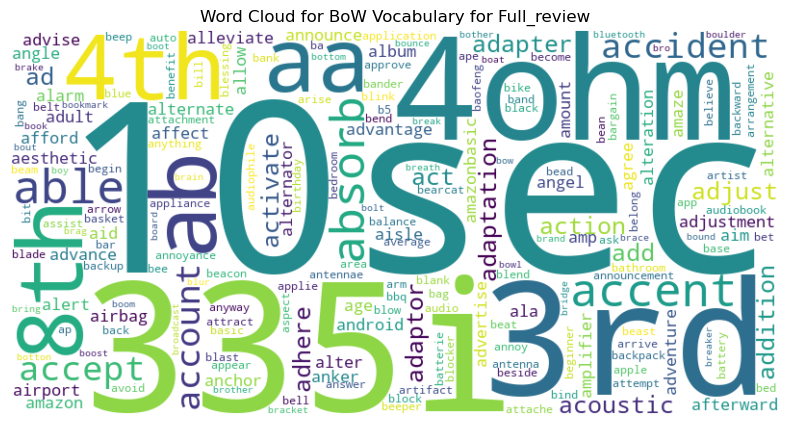

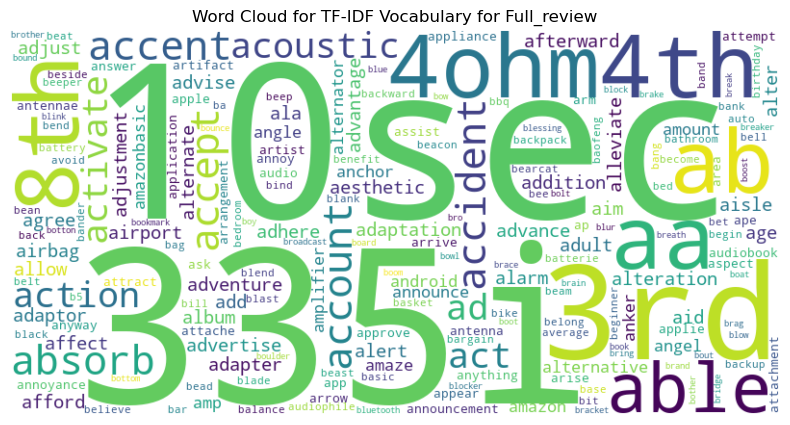

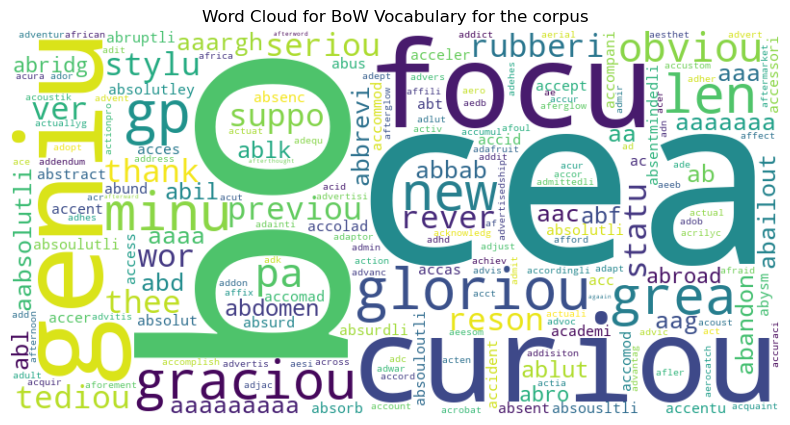

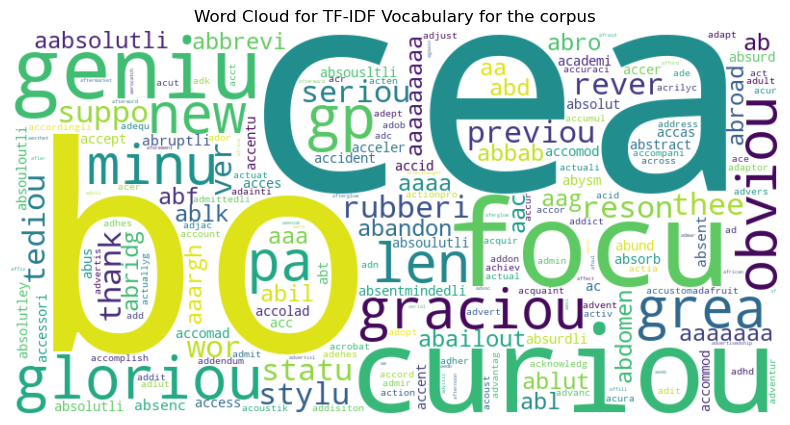

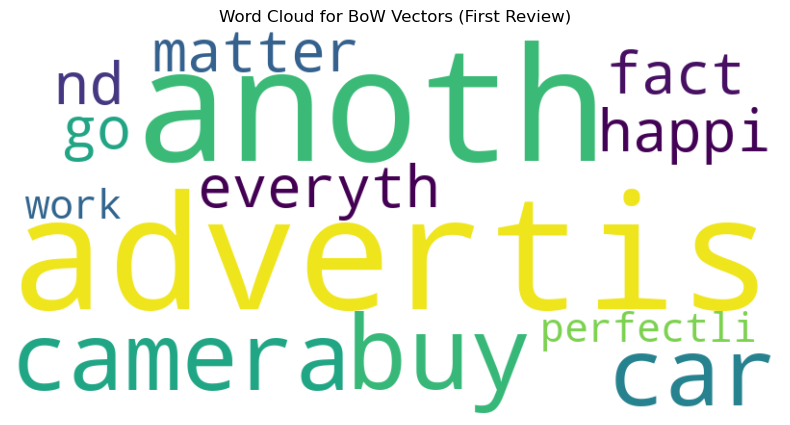

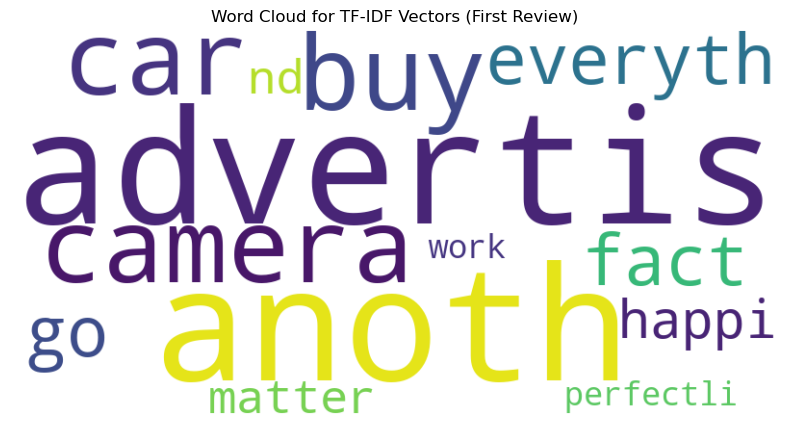

In [63]:

# Assuming df is your DataFrame
# Replace 'text_column' with the actual name of the column containing the textual reviews

# Extract the first review

#Extracting review from the corpus




# Bag of Words (BoW) Vectorizer for the full_review
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(df['full_review'])
bow_feature_names_review = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer for the full_review
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['full_review'])
tfidf_feature_names_review = tfidf_vectorizer.get_feature_names_out()

# Word Clouds
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    
# Word Cloud for BoW vocabulary for the full review
plot_word_cloud(' '.join(bow_feature_names_review), 'Word Cloud for BoW Vocabulary for Full_review')

# Word Cloud for TF-IDF vocabulary for the for Full_review
plot_word_cloud(' '.join(tfidf_feature_names_review), 'Word Cloud for TF-IDF Vocabulary for Full_review')

first_review = df['full_review'].iloc[0]

# Bag of Words (BoW) Vectorizer for the corpus
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(corpus_nltk_stem_lemma)
bow_feature_names = bow_vectorizer.get_feature_names_out()

# TF-IDF Vectorizer for the corpus
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(corpus_nltk_stem_lemma)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Word Cloud for BoW vocabulary for the corpus
plot_word_cloud(' '.join(bow_feature_names), 'Word Cloud for BoW Vocabulary for the corpus')

# Word Cloud for TF-IDF vocabulary for the corpus
plot_word_cloud(' '.join(tfidf_feature_names), 'Word Cloud for TF-IDF Vocabulary for the corpus')


# Word Cloud for BoW vectors of the first review
plot_word_cloud(' '.join([word for word in bow_feature_names if bow_vectors[0, bow_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for BoW Vectors (First Review)')

# Word Cloud for TF-IDF vectors of the first review
plot_word_cloud(' '.join([word for word in tfidf_feature_names if tfidf_vectors[0, tfidf_vectorizer.vocabulary_[word]] > 0]), 'Word Cloud for TF-IDF Vectors (First Review)')

# 6) Modeling 

## 6.1) Implementation of Vectorization and Models

### 6.1.1) Implementing Bag of Words Vectorization and Using Random Forest model

Model: Vectorization: Bag of Word<br> Classifier Model: Random Forest

Accuracy: 0.81375

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.58      0.67      1284
    positive       0.82      0.93      0.87      2716

    accuracy                           0.81      4000
   macro avg       0.80      0.75      0.77      4000
weighted avg       0.81      0.81      0.81      4000

Confustion Matrix
 [[ 742  542]
 [ 203 2513]]


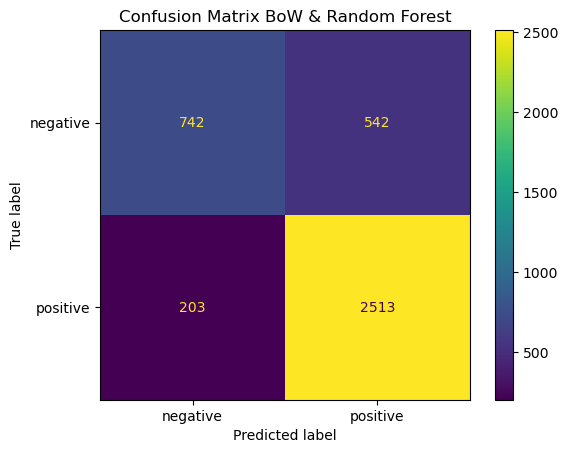

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

data = l

X= corpus_nltk_stem_lemma #df['full_review']
y = df['review_category']


#spliting of dataset size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Random Forest')
plt.show()

### 6.1.2) Implementing Bag of Words Vectorization and Using Naive Bayes model

 Model: Vectorization: BOW<br> Classifier Model: Naive Bayes

Accuracy: 0.82125

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.65      0.70      1284
    positive       0.84      0.90      0.87      2716

    accuracy                           0.82      4000
   macro avg       0.80      0.78      0.79      4000
weighted avg       0.82      0.82      0.82      4000

Confustion Matrix
 [[ 832  452]
 [ 263 2453]]


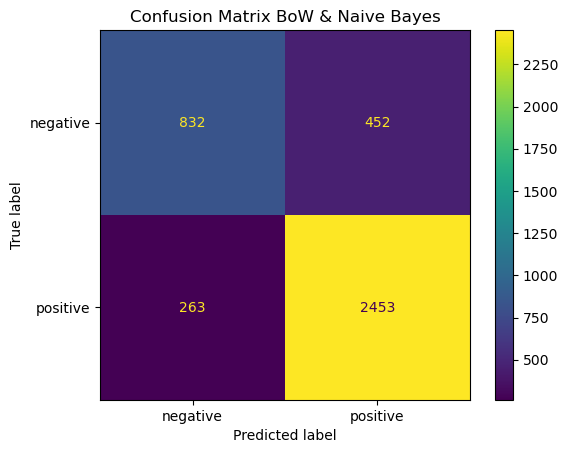

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma #df['full_review']
y = df['review_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix BoW & Naive Bayes')
plt.show()

In [67]:
classifier.feature_count_

array([[ 7.,  9.,  0., ...,  0.,  1.,  1.],
       [12., 17.,  1., ...,  1.,  0.,  0.]])

### 6.1.3) Implementing Bag of TFid Vectorization and Using Random Forest model

Model : Vectorization: tf-idf<br> Classifier Model: Random Forest

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma  #df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [69]:
X_train_vectorized.shape

(16000, 700)

In [70]:
vectorizer.get_feature_names_out()

array(['abl', 'absolut', 'accessori', 'actual', 'ad', 'adapt', 'add',
       'addit', 'adjust', 'advertis', 'ago', 'air', 'alarm', 'allow',
       'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz',
       'amazon', 'amp', 'android', 'angl', 'annoy', 'anoth', 'answer',
       'antenna', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'app',
       'appear', 'appl', 'area', 'around', 'arriv', 'ask', 'attach',
       'audio', 'automat', 'aux', 'avail', 'away', 'awesom', 'back',
       'bad', 'bag', 'band', 'base', 'basic', 'bass', 'batteri', 'beat',
       'beauti', 'behind', 'believ', 'best', 'better', 'big', 'bit',
       'black', 'blue', 'bluetooth', 'book', 'bose', 'bottom', 'bought',
       'box', 'br', 'brand', 'break', 'bright', 'broke', 'broken', 'bt',
       'buck', 'build', 'built', 'button', 'buy', 'cabl', 'call', 'cam',
       'came', 'camera', 'cannot', 'capabl', 'car', 'card', 'care',
       'carri', 'case', 'caus', 'cd', 'cell', 'certifi', 'chang',
       'c

Accuracy: 0.809

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.60      0.67      1284
    positive       0.83      0.91      0.87      2716

    accuracy                           0.81      4000
   macro avg       0.79      0.75      0.77      4000
weighted avg       0.80      0.81      0.80      4000

Confustion Matrix
 [[ 772  512]
 [ 252 2464]]


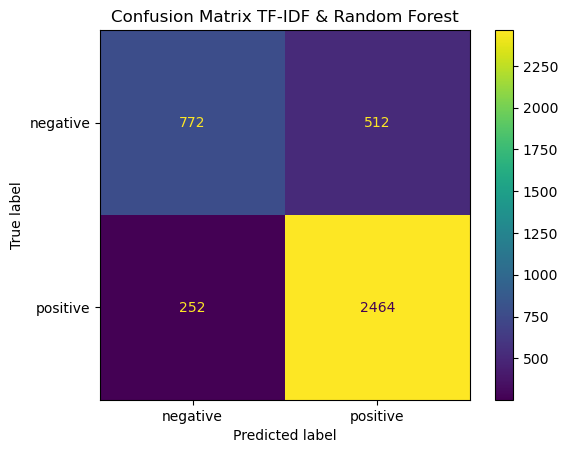

In [71]:
classifier = RandomForestClassifier()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Random Forest')
plt.show()

#### Top 25 features derived from trained model (Random Forest)

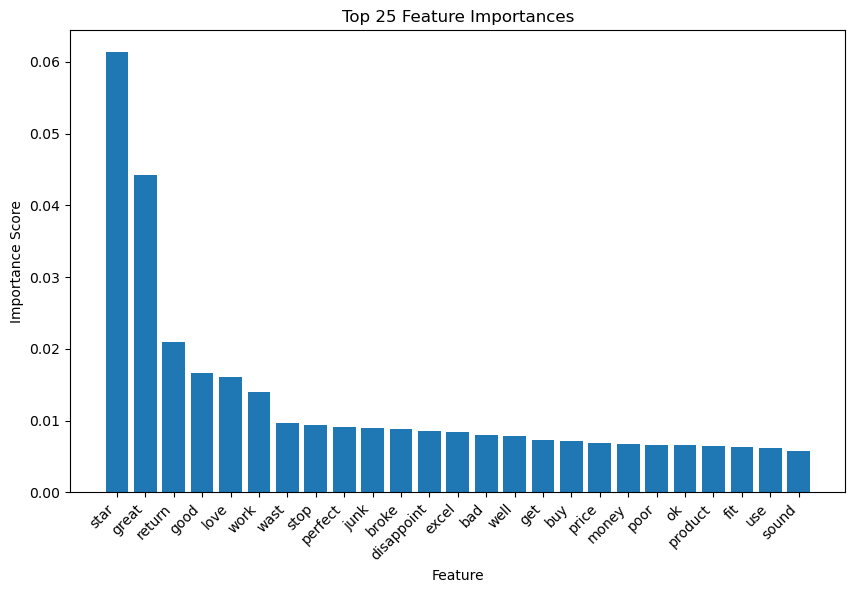

In [72]:
# Get feature importances from the trained model
feature_importances = classifier.feature_importances_

features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 25
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

### 6.1.4)Implementing Bag of TFid Vectorization and Using Naive Bayes model

Model: Vectorization: tf-idf<br> Classifier Model: Naive Bayes

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = l

X= corpus_nltk_stem_lemma   #df['full_review']
y = df['review_category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(strip_accents = 'ascii', lowercase = True, max_features=700)


X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [74]:
X_train_vectorized.shape

(16000, 700)

#### Deriving the vocabulary used for building vectors

In [75]:
vectorizer.get_feature_names_out()

array(['abl', 'absolut', 'accessori', 'actual', 'ad', 'adapt', 'add',
       'addit', 'adjust', 'advertis', 'ago', 'air', 'alarm', 'allow',
       'almost', 'along', 'alreadi', 'also', 'although', 'alway', 'amaz',
       'amazon', 'amp', 'android', 'angl', 'annoy', 'anoth', 'answer',
       'antenna', 'anyon', 'anyth', 'anyway', 'anywher', 'apart', 'app',
       'appear', 'appl', 'area', 'around', 'arriv', 'ask', 'attach',
       'audio', 'automat', 'aux', 'avail', 'away', 'awesom', 'back',
       'bad', 'bag', 'band', 'base', 'basic', 'bass', 'batteri', 'beat',
       'beauti', 'behind', 'believ', 'best', 'better', 'big', 'bit',
       'black', 'blue', 'bluetooth', 'book', 'bose', 'bottom', 'bought',
       'box', 'br', 'brand', 'break', 'bright', 'broke', 'broken', 'bt',
       'buck', 'build', 'built', 'button', 'buy', 'cabl', 'call', 'cam',
       'came', 'camera', 'cannot', 'capabl', 'car', 'card', 'care',
       'carri', 'case', 'caus', 'cd', 'cell', 'certifi', 'chang',
       'c

Accuracy: 0.7965

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.48      0.60      1284
    positive       0.79      0.95      0.86      2716

    accuracy                           0.80      4000
   macro avg       0.80      0.71      0.73      4000
weighted avg       0.80      0.80      0.78      4000

Confustion Matrix
 [[ 613  671]
 [ 143 2573]]


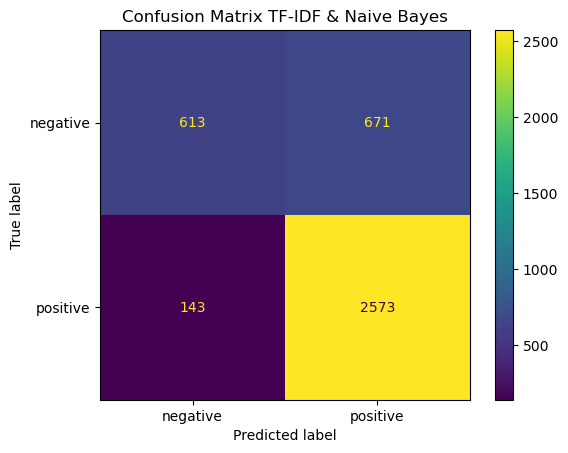

In [76]:
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confustion Matrix\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix TF-IDF & Naive Bayes')
plt.show()

#### Top 25 features derived from trained model (Naive Bayes)

['star' 'work' 'good' 'use' 'br' 'product' 'great' 'get' 'buy' 'charg']
['great' 'work' 'good' 'love' 'product' 'sound' 'use' 'price' 'well' 'br']


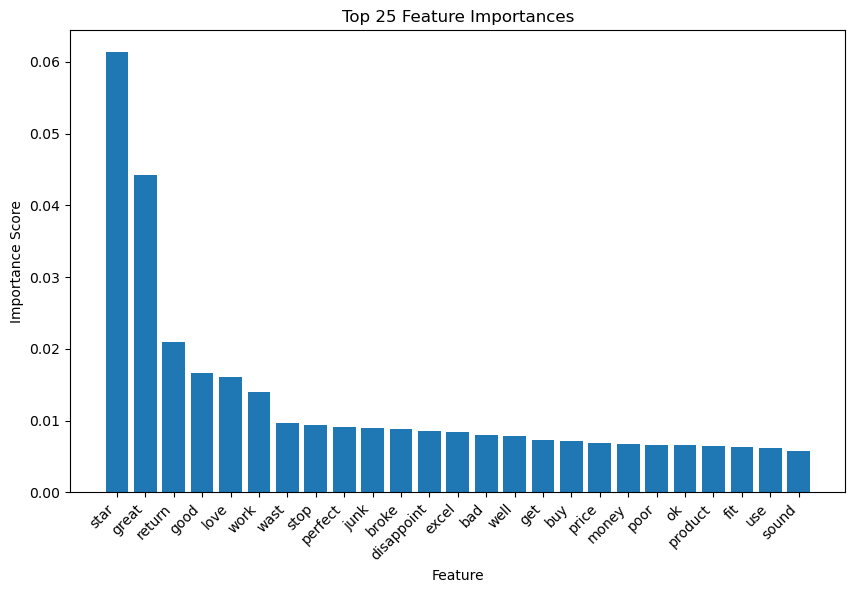

In [77]:
# Get feature importances from the trained model
#as the inbuild method was not directly  working for the we logarithmic probability for both the label and
#found the vectorizer macthed along with that
# Get feature importances from the trained model of Naive Bayes
neg_class_prob_sorted = classifier.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = classifier.feature_log_prob_[1, :].argsort()[::-1]

neg_importance_lst = (np.take(vectorizer.get_feature_names_out(), neg_class_prob_sorted[:10]))
print(np.take(vectorizer.get_feature_names_out(), neg_class_prob_sorted[:10]))
pos_importance_lst = (np.take(vectorizer.get_feature_names_out(), pos_class_prob_sorted[:10]))
print(np.take(vectorizer.get_feature_names_out(), pos_class_prob_sorted[:10]))

feature_importances_list = []
feature_importances_list.append(neg_importance_lst)
feature_importances_list.append(pos_importance_lst)

features = vectorizer.get_feature_names_out()

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]
# Plot the top N feature importances
top_n = 25
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[sorted_idx[:top_n]], align='center')
plt.xticks(range(top_n), features[sorted_idx[:top_n]], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top {} Feature Importances'.format(top_n))
plt.show()

# 7) Insights

## 7.1) Top 10 products by reivew count

/var/folders/tw/6lg866qn3zx323xyz7m36gw00000gn/T/ipykernel_33706/2038761690.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)


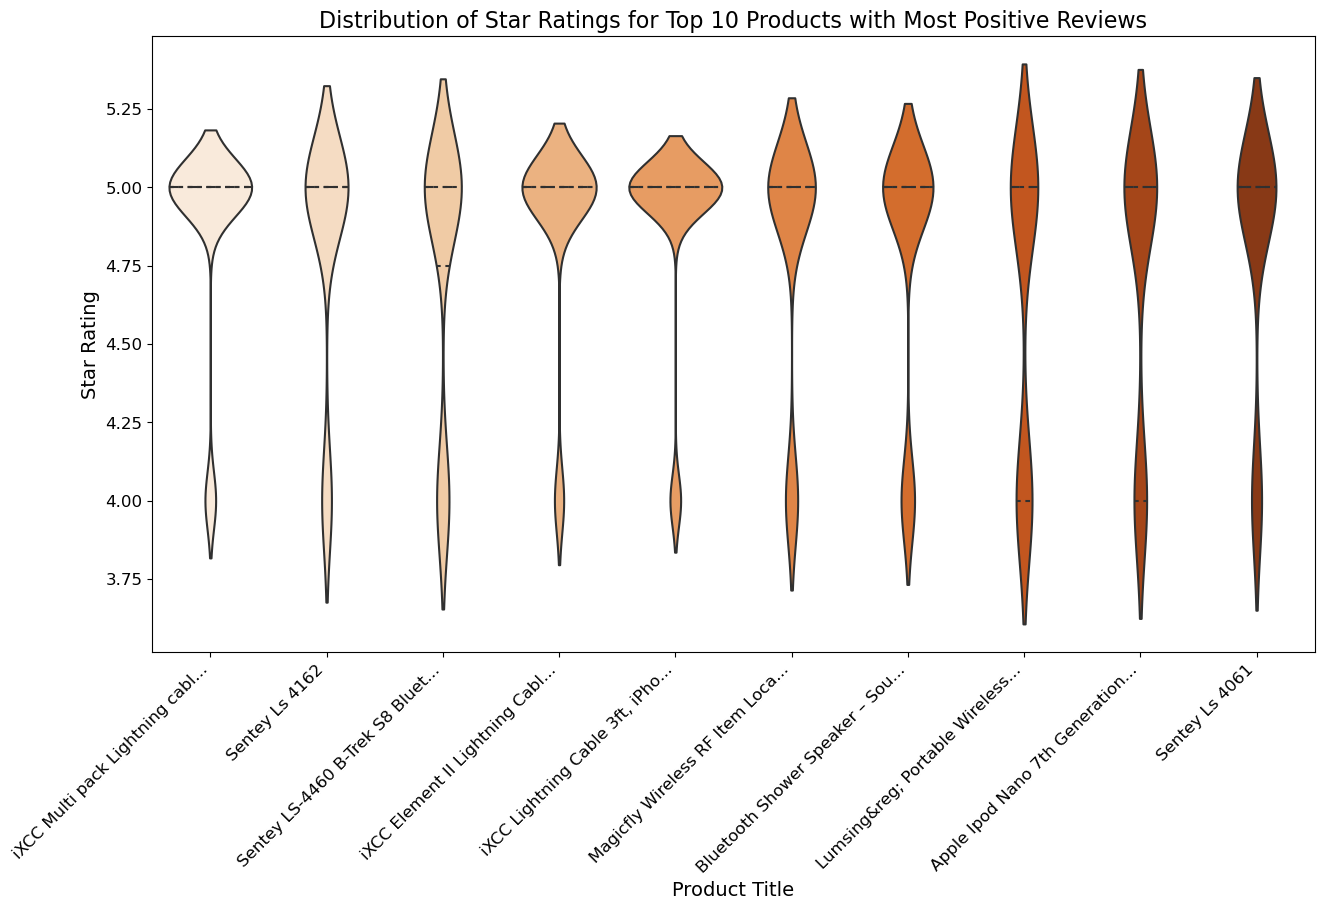

In [78]:
import seaborn as sns

# Assuming you have a DataFrame 'viz_df' with 'product_title' and 'review_category' columns

# Filter for positive reviews
positive_reviews = viz_df[viz_df['review_category'] == 'positive']

# Get the top 10 products with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(10).index

# Filter the DataFrame for the top 10 products
top_positive_df = positive_reviews[positive_reviews['product_title'].isin(top_positive_products)]

# Adjust figure size for better visualization
plt.figure(figsize=(15, 8))

# Limit the length of product titles for better visualization
top_positive_df['product_title'] = top_positive_df['product_title'].apply(lambda x: x[:30] + "..." if len(x) > 30 else x)

# Plot a violin plot
sns.violinplot(x='product_title', y='star_rating', data=top_positive_df, palette='Oranges', inner='quartile')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust font size and rotation
plt.yticks(fontsize=12)  # Adjust y-axis tick font size
plt.xlabel('Product Title', fontsize=14)  # Adjust x-axis label font size
plt.ylabel('Star Rating', fontsize=14)  # Adjust y-axis label font size
plt.title('Distribution of Star Ratings for Top 10 Products with Most Positive Reviews', fontsize=16)  # Adjust title font size
plt.show()



## 7.3)Top 10 reviewers

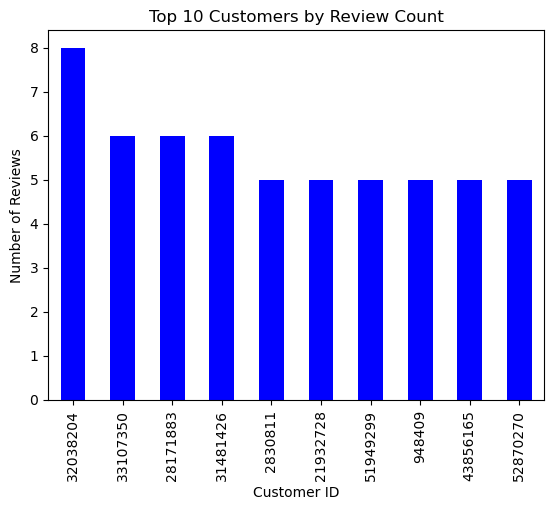

In [79]:
customer_review_count = viz_df['customer_id'].value_counts().head(10)  # Displaying top 10 customers by review count
customer_review_count.plot(kind='bar', color='blue')
plt.xlabel('Customer ID')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Customers by Review Count')
plt.show()


## 7.4)Top 5 products with highest count of positive review

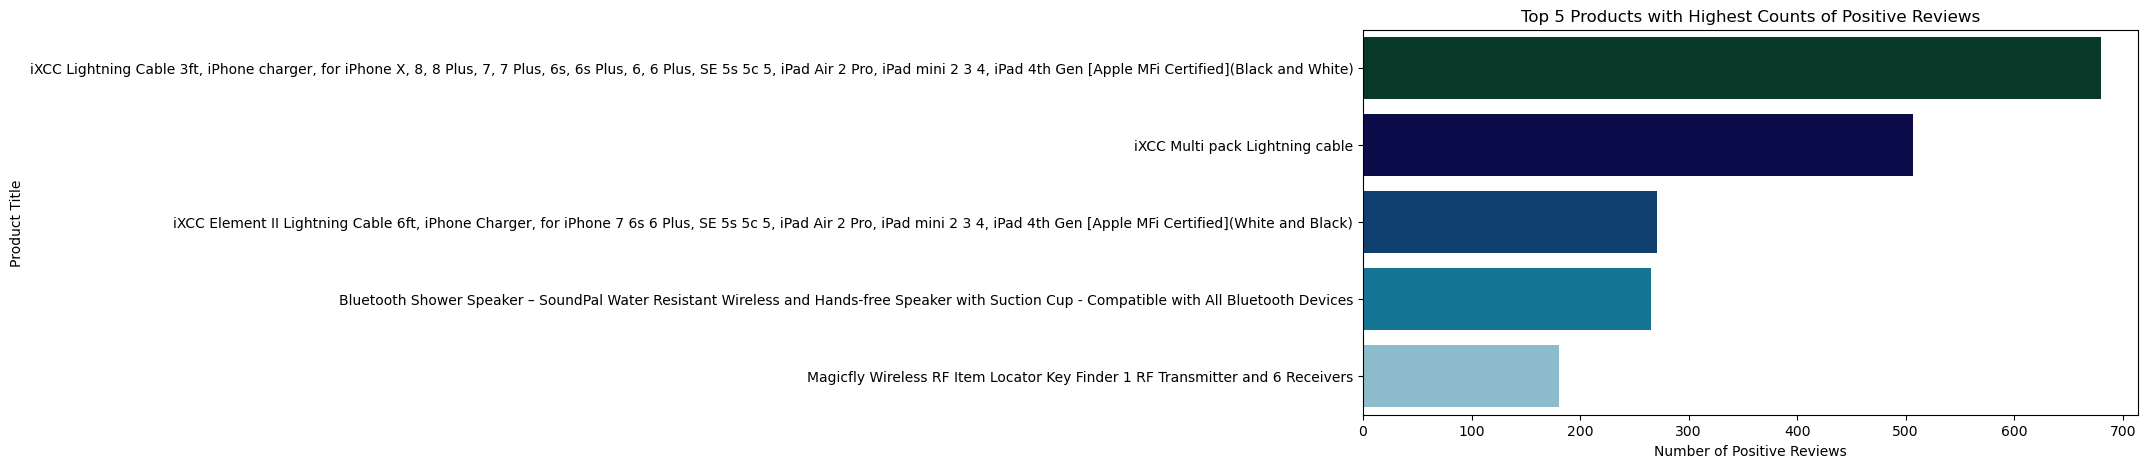

In [80]:
import seaborn as sns

# Assuming you have a 'sentiment_label' column in your DataFrame
positive_reviews = viz_df[viz_df['review_category'] == 'positive']

# Get the top 5 products with the highest counts of positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=top_positive_products.values, y=top_positive_products.index, palette='ocean')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product Title')
plt.title('Top 5 Products with Highest Counts of Positive Reviews')
plt.show()


## 7.5) Top 5 Best Prodcuts by IDs

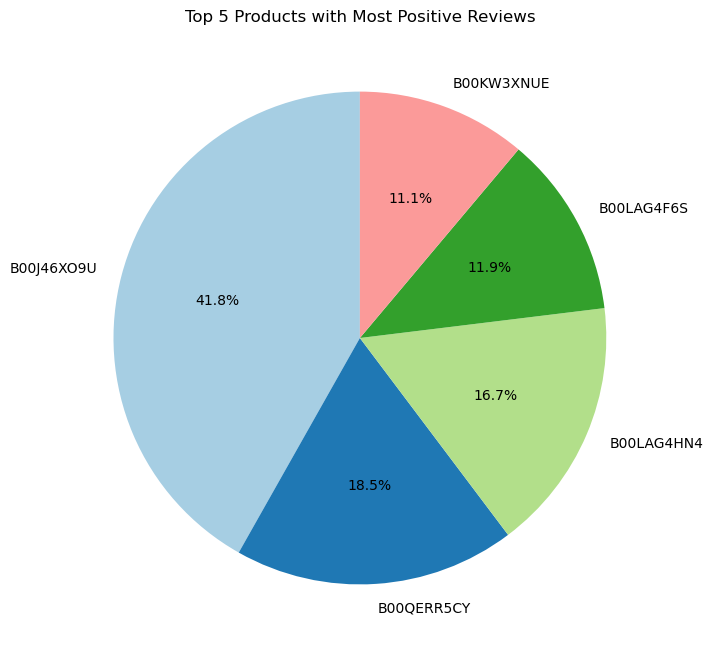

In [81]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id' and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = viz_df[viz_df['review_category'] == 'positive']

# Get the top 5 product IDs with the most positive reviews
top_positive_products = positive_reviews['product_id'].value_counts().head(5)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Products with Most Positive Reviews')
plt.show()


## 7.6)Top 5 products with most positive reviews

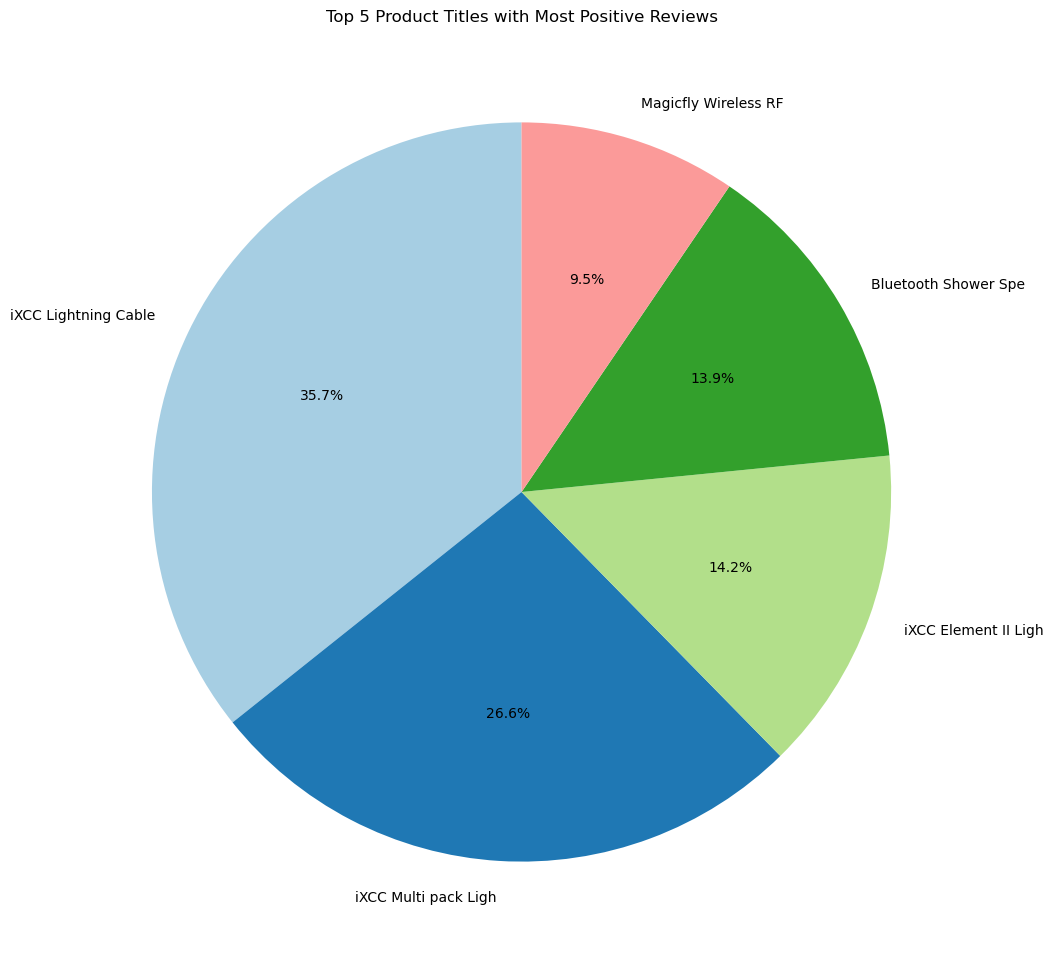

In [82]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with 'product_id', 'product_title', and 'sentiment_label' columns

# Filter for positive reviews
positive_reviews = viz_df[viz_df['review_category'] == 'positive']

# Get the top 5 product titles with the most positive reviews
top_positive_products = positive_reviews['product_title'].value_counts().head(5)

# Limit the length of product titles for better visualization
top_positive_products.index = top_positive_products.index.str[:20]  # You can adjust the length as needed

# Adjust figure size for better visualization
plt.figure(figsize=(12, 12))

# Plot the pie chart with product titles as labels
plt.pie(top_positive_products, labels=top_positive_products.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Product Titles with Most Positive Reviews')
plt.show()



# 8)Summary on models and performances

The table provides an overview of the performance metrics for classification algorithms (Random Forest and Naive Bayes) using different vectorization techniques (Bag of Words (BOW) and TF-IDF). Here's a summary of the results:

<table>
    <tr>
        <td>&quot;Classification  </td>
    </tr>
    <tr>
        <td>Algorithm&quot;</td>
        <td>Vectorization Techniques</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>BOW Vectorizer</td>
        <td></td>
        <td></td>
        <td>TF-IDF</td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <td></td>
        <td>Accuracy</td>
        <td>F1 score</td>
        <td>Precision</td>
        <td>Accuracy</td>
        <td>F1 score</td>
        <td>Precision</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>0.81</td>
        <td>0.81</td>
        <td>0.81</td>
        <td>0.8</td>
        <td>0.8</td>
        <td>0.8</td>
    </tr>
    <tr>
        <td>Naive Bayes</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.82</td>
        <td>0.79</td>
        <td>0.78</td>
        <td>0.8</td>
    </tr>
    
</table>

## Key Observations:

- Naive Bayes generally outperforms Random Forest across all metrics and vectorization techniques.
- BOW Vectorization consistently yields higher metrics compared to TF-IDF for both algorithms.
- Naive Bayes achieves a high accuracy of 0.82 with BOW Vectorization.
- Random Forest demonstrates robust performance but slightly lower than Naive Bayes in most cases.
- TF-IDF, while effective, results in a slight dip in performance for both algorithms compared to BOW Vectorization.

# 9) Conclusion:

The choice of vectorization technique impacts model performance, with BOW generally delivering better results in this scenario.
Naive Bayes appears to be a more suitable algorithm for this classification task based on the provided metrics.
Further analysis and experimentation could explore additional vectorization methods and algorithms to optimize performance.

# 10) Future Scope:

In the future, refining model performance could involve tweaking model parameters through hyperparameter tuning, considering ensemble methods for a combined model approach, and exploring deep learning techniques like recurrent neural networks. Feature engineering, or creating new relevant features, could further enhance the models. Implementing robust cross-validation and adapting the models for real-time analysis would ensure their reliability and responsiveness to new data. Fine-tuning models specifically for sentiment analysis, experimenting with additional vectorization techniques, and focusing on interpretability for user trust are other avenues to explore. Additionally, extending the analysis to handle multiclass sentiment scenarios, integrating a user-friendly interface for presenting insights, and continuous monitoring and updating of models for evolving consumer review patterns are vital for sustained effectiveness.